<a href="https://colab.research.google.com/github/DharmikPatel916/CE888/blob/main/assignment/essex_police_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [6]:
#drive mount
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Load the Data

essex20_1 = pd.read_csv('/content/drive/MyDrive/Essex Police Data/2020-01/2020-01-essex-stop-and-search.csv')
essex20_2 = pd.read_csv('/content/drive/MyDrive/Essex Police Data/2020-02/2020-02-essex-stop-and-search.csv')
essex20_3 = pd.read_csv('/content/drive/MyDrive/Essex Police Data/2020-03/2020-03-essex-stop-and-search.csv')
essex20_4 = pd.read_csv('/content/drive/MyDrive/Essex Police Data/2020-04/2020-04-essex-stop-and-search.csv')
essex20_5 = pd.read_csv('/content/drive/MyDrive/Essex Police Data/2020-05/2020-05-essex-stop-and-search.csv')
essex20_6 = pd.read_csv('/content/drive/MyDrive/Essex Police Data/2020-06/2020-06-essex-stop-and-search.csv')
essex20_7 = pd.read_csv('/content/drive/MyDrive/Essex Police Data/2020-07/2020-07-essex-stop-and-search.csv')
essex20_8 = pd.read_csv('/content/drive/MyDrive/Essex Police Data/2020-08/2020-08-essex-stop-and-search.csv')
essex20_9 = pd.read_csv('/content/drive/MyDrive/Essex Police Data/2020-09/2020-09-essex-stop-and-search.csv')
essex20_10 = pd.read_csv('/content/drive/MyDrive/Essex Police Data/2020-10/2020-10-essex-stop-and-search.csv')
essex20_11 = pd.read_csv('/content/drive/MyDrive/Essex Police Data/2020-11/2020-11-essex-stop-and-search.csv')
essex20_12 = pd.read_csv('/content/drive/MyDrive/Essex Police Data/2020-12/2020-12-essex-stop-and-search.csv')

#select the date format
essex20_1["Date"] = "2020-01"
essex20_2["Date"] = "2020-02"
essex20_3["Date"] = "2020-03"
essex20_4["Date"] = "2020-04"
essex20_5["Date"] = "2020-05"
essex20_6["Date"] = "2020-06"
essex20_7["Date"] = "2020-07"
essex20_8["Date"] = "2020-08"
essex20_9["Date"] = "2020-09"
essex20_10["Date"] = "2020-11"
essex20_11["Date"] = "2020-11"
essex20_12["Date"] = "2020-12"

essex2020 = pd.concat([essex20_1,essex20_2,essex20_3,essex20_4,essex20_5,essex20_6,essex20_7,essex20_8,essex20_9,essex20_10,essex20_11,essex20_12])
essex = pd.concat([essex2020])
essex["City"] = "Colchester"
essex= pd.DataFrame(essex)
essex.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,City
0,Person search,2020-01,False,NaN,51.842625,0.785231,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,1.0,False,Colchester
1,Person search,2020-01,False,NaN,51.842625,0.785231,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,1.0,False,Colchester
2,Person search,2020-01,False,NaN,51.842625,0.785231,Male,10-17,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,1.0,False,Colchester
3,Vehicle search,2020-01,False,NaN,51.842625,0.785231,NaN,NaN,NaN,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Community resolution,1.0,NaN,Colchester
4,Person search,2020-01,False,NaN,51.537024,0.686069,Male,over 34,White - Any other White background,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,NaN,1.0,False,Colchester


In [13]:
#Getting subset and remove nan row
df= pd.concat([essex])
new = df[['Type','Date','City','Officer-defined ethnicity','Self-defined ethnicity','Gender','Age range','Removal of more than just outer clothing','Outcome']]
new_df = new.dropna()
new_df = new_df.reset_index(drop=True)
new_df.head()

,Type,Date,City,Officer-defined ethnicity,Self-defined ethnicity,Gender,Age range,Removal of more than just outer clothing,Outcome
0,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,10-17,False,Community resolution
1,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,10-17,False,Community resolution
2,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,10-17,False,Community resolution
3,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,18-24,False,Khat or Cannabis warning
4,Person search,2020-01,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,Male,25-34,False,Khat or Cannabis warning


In [14]:
#shape of New data
new_df.shape

(15872, 9)

Data Transformation and Sensitive Features:

In [15]:
#By Age
df['Age range'].value_counts()

18-24       7852
25-34       4284
10-17       4275
over 34     3427
under 10       3
Name: Age range, dtype: int64

In [16]:
#Stops By Race
df["Officer-defined ethnicity"].value_counts()

White    16651
Black     2024
Asian     1037
Other      726
Mixed      107
Name: Officer-defined ethnicity, dtype: int64

In [17]:
#Stops By Gender
df["Gender"].value_counts()

Male      18212
Female     2473
Other        12
Name: Gender, dtype: int64

In [18]:
#frequency distribution of categorical data
new_df['Self-defined ethnicity'].value_counts()

White - English/Welsh/Scottish/Northern Irish/British                                   11278
Other ethnic group - Not stated                                                          1378
White - Any other White background                                                        732
Black/African/Caribbean/Black British - African                                           524
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background      468
Asian/Asian British - Any other Asian background                                          414
Black/African/Caribbean/Black British - Caribbean                                         284
Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background                 212
Mixed/Multiple ethnic groups - White and Black Caribbean                                  118
Asian/Asian British - Pakistani                                                            92
Asian/Asian British - Indian                                

Data visualization and pre-processing:

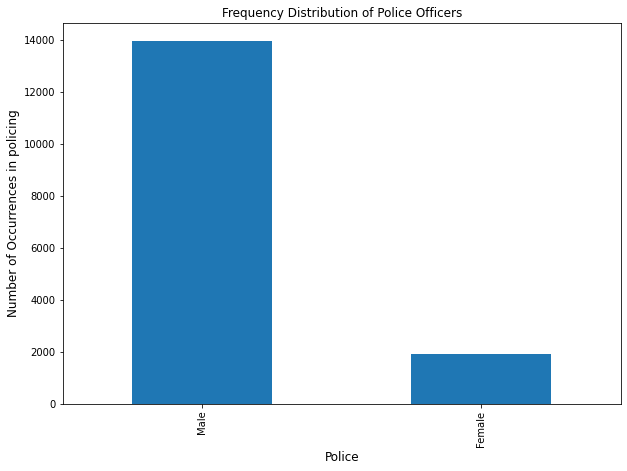

In [19]:
ax = new_df['Gender'].value_counts().plot(kind='bar', figsize=(10,7));
ax.set_title("Frequency Distribution of Police Officers", fontsize=12)
ax.set_ylabel('Number of Occurrences in policing', fontsize=12)
ax.set_xlabel('Police', fontsize=12)

y = []

# find the values and append to list
for i in ax.patches:
    y.append(i.get_height())

# set individual bar lables using above list
y = sum(y)

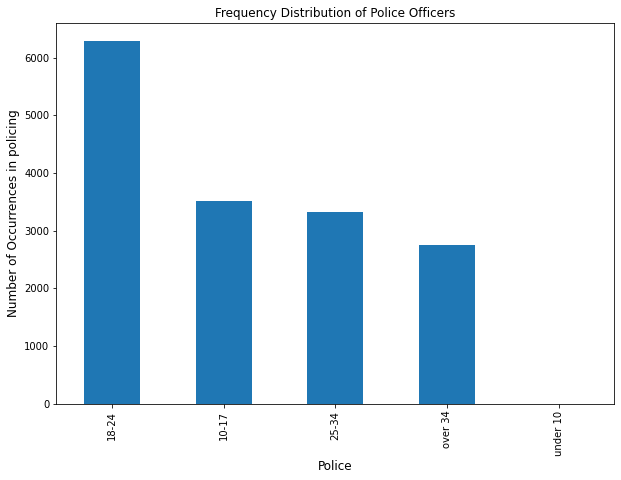

In [20]:
ax = new_df['Age range'].value_counts().plot(kind='bar', figsize=(10,7));

ax.set_title("Frequency Distribution of Police Officers", fontsize=12)
ax.set_ylabel('Number of Occurrences in policing', fontsize=12)
ax.set_xlabel('Police', fontsize=12)

y = []

# find the values and append to list
for i in ax.patches:
    y.append(i.get_height())

# set individual bar lables using above list
y = sum(y)

In [ ]:
ax = new_df['Officer-defined ethnicity'].value_counts().plot(kind='bar', figsize=(10,7));
ax.set_title("Frequency Distribution of Police Officers", fontsize=12)
ax.set_ylabel('Number of Occurrences in policing', fontsize=12)
ax.set_xlabel('Police', fontsize=12)

y = []

# find the values and append to list
for i in ax.patches:
    y.append(i.get_height())

# set individual bar lables using above list
y = sum(y)

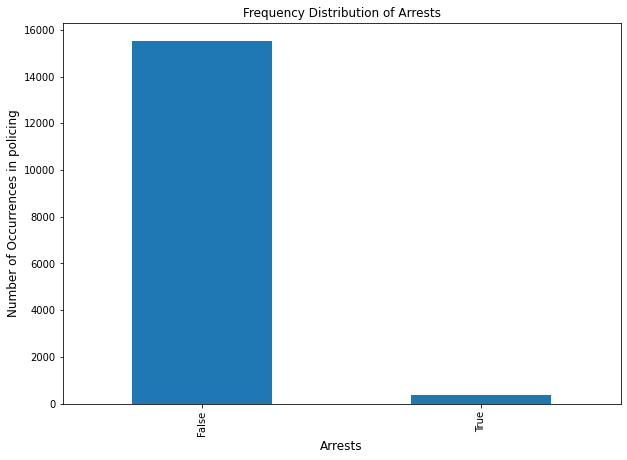

In [22]:
bx = new_df['Removal of more than just outer clothing'].value_counts().plot(kind='bar', figsize=(10,7));
bx.set_title("Frequency Distribution of Arrests", fontsize=12)
bx.set_ylabel('Number of Occurrences in policing', fontsize=12)
bx.set_xlabel('Arrests', fontsize=12)


y = []

# find the values and append to list
for i in bx.patches:
    y.append(i.get_height())

# set individual bar lables using above list
y = sum(y)

In [24]:
# set individual bar lables using above list
print("percentage of while, black , asian and other police:")
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    a = str(round((i.get_height()/y)*100, 2))
    print(a)

percentage of while, black , asian and other police:
81.79
9.53
4.92
3.77


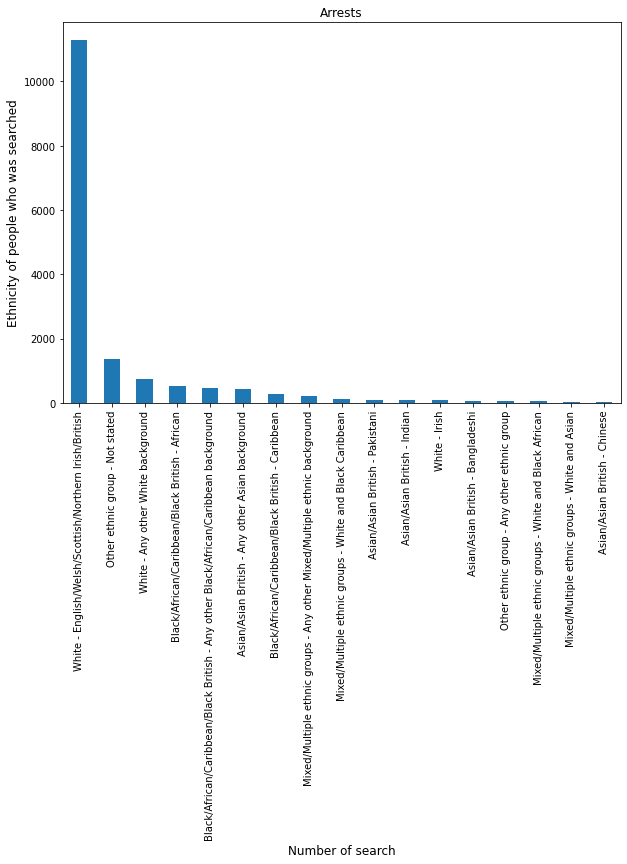

In [25]:
cx = new_df['Self-defined ethnicity'].value_counts().plot(kind='bar', figsize=(10,7));
cx.set_alpha(0.8)
cx.set_title("Arrests", fontsize=12)
cx.set_ylabel('Ethnicity of people who was searched', fontsize=12)
cx.set_xlabel('Number of search', fontsize=12)

# create a list to collect the plt.patches data
y = []

# find the values and append to list
for i in cx.patches:
    y.append(i.get_height())

# set individual bar lables using above list
y = sum(y)

In [26]:
df2 = new_df[["City","Officer-defined ethnicity","Self-defined ethnicity","Removal of more than just outer clothing"]]
df2.head()

,City,Officer-defined ethnicity,Self-defined ethnicity,Removal of more than just outer clothing
0,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,False
1,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,False
2,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,False
3,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,False
4,Colchester,White,White - English/Welsh/Scottish/Northern Irish/...,False


In [27]:
labelencoder = LabelEncoder()
df2['Removal of more than just outer clothing'] = labelencoder.fit_transform(df2['Removal of more than just outer clothing'])
df2['City'] = labelencoder.fit_transform(df2['City'])
df2 = pd.get_dummies(df2, columns=['Self-defined ethnicity'], prefix = ['self'])
print(df2.head())

   City  ... self_White - Irish
0     0  ...                  0
1     0  ...                  0
2     0  ...                  0
3     0  ...                  0
4     0  ...                  0

[5 rows x 20 columns]


In [28]:
#helper function
def compute_outcome_stats(dfdf):
    """Compute statistics regarding the relative quanties of arrests, warnings, and citations"""
    n_total = len(dfdf)
    n_warnings = len(dfdf[dfdf['Outcome'] == 'Khat or Cannabis warning'])
    n_penalty = len(dfdf[dfdf['Outcome'] == 'Penalty Notice for Disorder'])
    n_arrests = len(dfdf[dfdf['Outcome'] == 'Arrest'])
    penalty_per_warning = n_penalty / n_warnings
    arrest_rate = n_arrests / n_total

    return(pd.Series(data = {
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_penalty': n_penalty,
        'n_arrests': n_arrests,
        'penalty_per_warning': penalty_per_warning,
        'arrest_rate': arrest_rate
    }))
compute_outcome_stats(df)

n_total                22257.000000
n_warnings              1528.000000
n_penalty                 12.000000
n_arrests               2208.000000
penalty_per_warning        0.007853
arrest_rate                0.099205
dtype: float64

In [29]:
#breakdown by gender (using helper function)
new_df.groupby('Gender').apply(compute_outcome_stats)

,n_total,n_warnings,n_penalty,n_arrests,penalty_per_warning,arrest_rate
Gender,,,,,,
Female,1907.0,129.0,0.0,116.0,0.000000,0.060829
Male,13965.0,1170.0,4.0,1420.0,0.003419,0.101683


In [30]:
#breakdown by race (using helper function)
new_df.groupby('Officer-defined ethnicity').apply(compute_outcome_stats)

,n_total,n_warnings,n_penalty,n_arrests,penalty_per_warning,arrest_rate
Officer-defined ethnicity,,,,,,
Asian,781.0,72.0,0.0,90.0,0.000000,0.115237
Black,1512.0,129.0,1.0,202.0,0.007752,0.133598
Other,598.0,44.0,0.0,54.0,0.000000,0.090301
White,12981.0,1054.0,3.0,1190.0,0.002846,0.091672


In [31]:
#Racial bias
privileged_group = new_df[new_df["Officer-defined ethnicity"] == "Whites"]
underprivileged_group = new_df[new_df["Officer-defined ethnicity"] == "Non-Whites"]

In [33]:
#Gender bias
privileged_group = new_df[new_df["Gender"] == "FEMALE"]
underprivileged_group = new_df[new_df["Gender"] == "MALE"]